# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [3]:
df = pd.read_csv(os.path.join('..','dataset', 'ucla-admissions.csv'))
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [4]:
# TODO
df.shape

(400, 4)

Answer:399 observations in total

> ### Question 2.  Create a summary table.

In [5]:
# TODO
df.describe()

C:\Users\charlene.chen\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

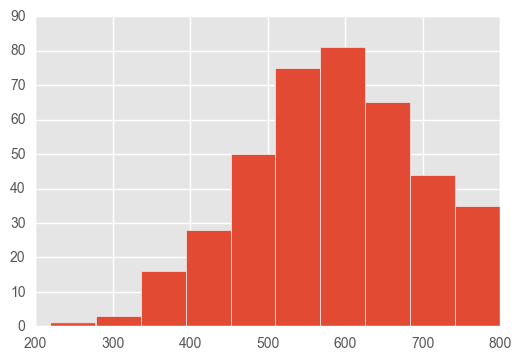

In [7]:
# TODO
df.gre.hist()

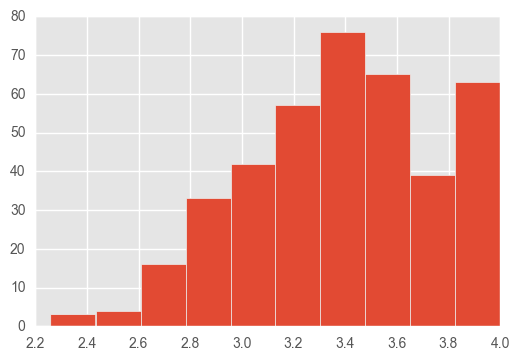

In [8]:
df.gpa.hist()

Answer:the range of values of GPA is much smaller than GRE. 

> ### Question 4.  Drop data points with missing data.

In [9]:
# TODO
df = df.dropna()

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [10]:
# TODO
df.shape


(397, 4)

> ### Question 6.  Create boxplots for `gre` and `gpa`.

{'boxes': [<matplotlib.lines.Line2D at 0xd66d1d0>],
 'caps': [<matplotlib.lines.Line2D at 0xd7cbfd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x421e358>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc7839e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xd66d748>,
  <matplotlib.lines.Line2D at 0xd654c50>]}

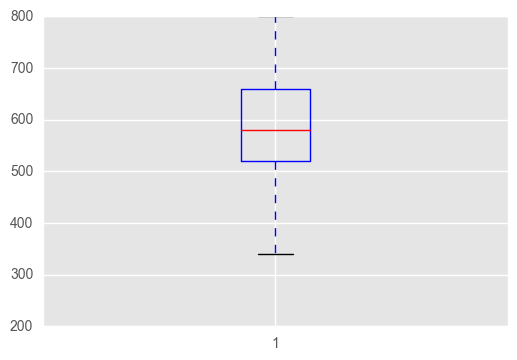

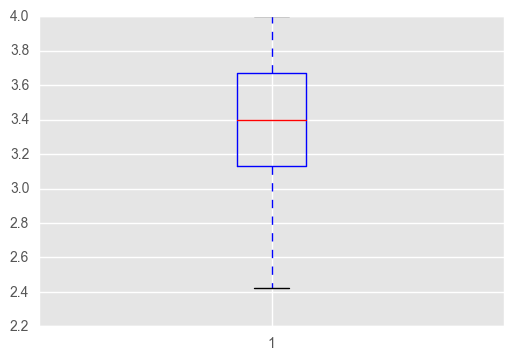

In [11]:
# TODO
plt.figure(1)
plt.boxplot([df.gre])
plt.figure(2)
plt.boxplot([df.gpa])

In [12]:
# TODO
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


> ### Question 7.  What do boxplots show?

Answer: mean(50%), 25%, 75%, min, and max values

> ### Question 8.  Plot the distribution of each variable.

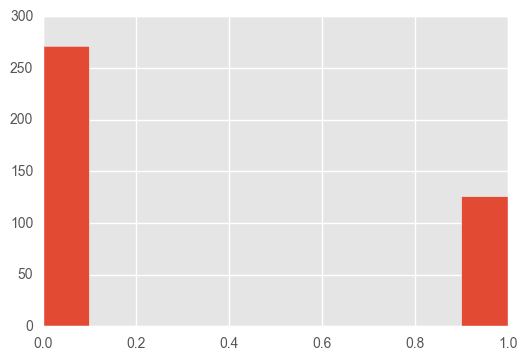

In [13]:
# TODO
df.admit.hist()

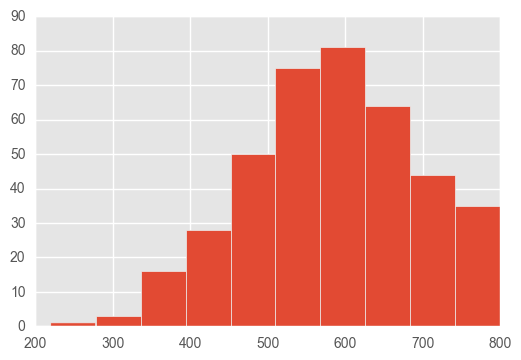

In [14]:
# TODO
df.gre.hist()

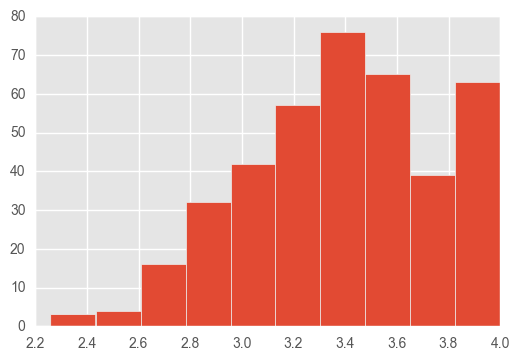

In [15]:
# TODO
df.gpa.hist()

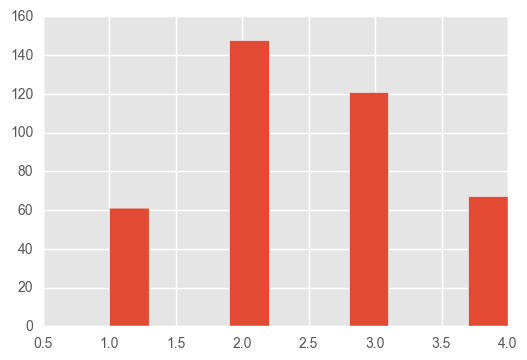

In [16]:
# TODO
df.prestige.hist()

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [17]:
# TODO
GRE model is a normal distribution, and GPA model is close to a normal distribution while a little skewed.

SyntaxError: invalid syntax (<ipython-input-17-409256040505>, line 2)

In [24]:
# TODO
df['log_gpa']=df.gpa.apply(lambda x: np.log(x))

Answer:

In [25]:
df.head()

,admit,gre,gpa,prestige,log_gpa
0,0,380.0,3.61,3.0,1.283708
1,1,660.0,3.67,3.0,1.300192
2,1,800.0,4.00,1.0,1.386294
3,1,640.0,3.19,4.0,1.160021
4,0,520.0,2.93,4.0,1.075002


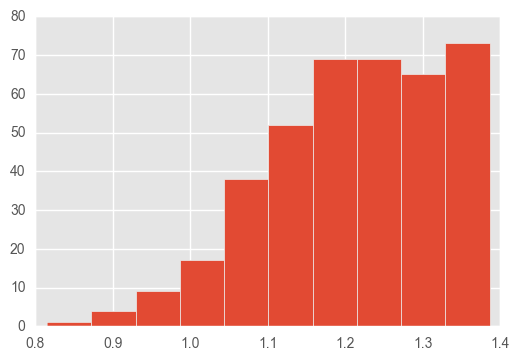

In [26]:
df.log_gpa.hist()

> ### Question 10.  Create a correlation matrix for the dataset

In [37]:
# TODO
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer:By looking at pairwise correlation of all columns, GRE and GPA are relatively higher correlated with a correlation score of 0.382408 - therefore they could be potentially colinear.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer:fit a linear regression model with admission as a Y variable and prestige of undergraduate schools as X variable. Run a P-value test to see if the learned parameter is siginifant.

> ### Question 13.  What is your hypothesis?

Answer:Applicants will be more likely to get admitted by UCLA graduate school if they went to a more prestige undergraduate school compared to less prestige ones.